In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sdv

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    classification_report,
    roc_curve,
)

from imblearn.over_sampling import SMOTE

In [2]:
bank_df = pd.read_csv('/Users/genesisoyelaja/Desktop/Gee Library (Global)/🐍Python Repository/Raw Data Files/csv files/Churn_Modelling.csv')

In [14]:
bank_df.info()

print(f'\n The shape of this dataframe is: {bank_df.shape}')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB

 The shape of this dataframe is: (10002, 14)


In [9]:
bank_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [10]:
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [11]:
bank_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [19]:
bank_df.duplicated().sum() # Count duplicate rows in the dataframe
print(f'\n The number of duplicate rows in this dataframe is: {bank_df.duplicated().sum()}')

bank_df.drop_duplicates(inplace=True) # Drop duplicate rows

bank_df.reset_index(drop=True, inplace=True) # Reset index after dropping duplicates
print(f'\n The shape of this dataframe after dropping duplicates is: {bank_df.shape}')



 The number of duplicate rows in this dataframe is: 0

 The shape of this dataframe after dropping duplicates is: (10000, 14)


In [ ]:
bank_df['Age'] = bank_df['Age'].fillna(bank_df['Age'].mean()) # Fill missing values in 'Age' with the mean

bank_df = bank_df.dropna(subset = ['Geography']) # Drop rows with missing values in 'Geography' column


bank_df['HasCrCard'] = bank_df['HasCrCard'].fillna(bank_df['HasCrCard'].mode()[0])

bank_df['IsActiveMember'] = bank_df['IsActiveMember'].fillna(bank_df['IsActiveMember'].mode()[0]) # Fill missing values in 'Exited' with the mode

In [33]:
print(f'Any missing values in bank_df: {bank_df.isnull().values.any()}') # Check if there are any remaining missing values in the dataframe

print(f'\nChecking for any remaining missing values in each column: \n\n{bank_df.isnull().sum()}') # Check for any remaining missing values in each column



Any missing values in bank_df: False

Checking for any remaining missing values in each column: 

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [34]:
# dropping irrelevant columns 
bank_df = bank_df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])

# Convert categorical variables to numerical using one-hot encoding
bank_df = pd.get_dummies(bank_df, columns = ['Geography', 'Gender'], drop_first = True)


In [35]:
X = bank_df.drop(columns = ['Exited']) # Features

y = bank_df['Exited'] # Target variable


In [38]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y )

print(f'Training set size: {X_train.shape[0]}') #print the size of the training set
print(f'Testing set size: {x_test.shape[0]}') #print the size of the testing set

Training set size: 7999
Testing set size: 2000


In [42]:
from sklearn.preprocessing import StandardScaler # Scale the features using StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(x_test)

In [45]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [49]:
print(f'Before SMOTE:  {y_train.value_counts()}')

print(f'After SMOTE: {y_train_smote.value_counts()}')


Before SMOTE:  Exited
0    6369
1    1630
Name: count, dtype: int64
After SMOTE: Exited
0    6369
1    6369
Name: count, dtype: int64


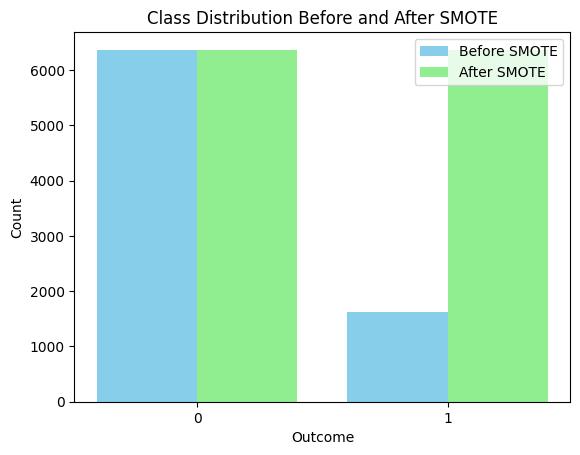

In [50]:
# Visualize the new class distribution
counts_before = y_train.value_counts()
counts_after = y_train_smote.value_counts()

plt.bar([0, 1], [counts_before.get(0, 0), counts_before.get(1, 0)], width=0.4, label='Before SMOTE', color='skyblue')
plt.bar([0.4, 1.4], [counts_after.get(0, 0), counts_after.get(1, 0)], width=0.4, label='After SMOTE', color='lightgreen')

plt.title('Class Distribution Before and After SMOTE')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks([0.2, 1.2], ['0', '1'])
plt.legend()
plt.show()

In [51]:
# Initialize the models
model_orig = LogisticRegression(solver='liblinear', max_iter=200)
model_smote = LogisticRegression(solver='liblinear', max_iter=200)

# Train the model on original data
model_orig.fit(X_train_scaled, y_train)

# Train the model on SMOTE data
model_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=200, solver='liblinear')

In [52]:
# Make predictions on the test set
y_pred_orig = model_orig.predict(x_test_scaled)
y_pred_smote = model_smote.predict(x_test_scaled)

# Predictions probability for ROC-AUC
y_prob_orig = model_orig.predict_proba(x_test_scaled)[:, 1]
y_prob_smote = model_smote.predict_proba(x_test_scaled)[:, 1]

# Evaluate the model's performance
def evaluate_model(y_test, y_pred, y_prob):
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("Precision:", round(precision_score(y_test, y_pred), 4))
    print("Recall:", round(recall_score(y_test, y_pred), 4))
    print("ROC-AUC:", round(roc_auc_score(y_test, y_prob), 4))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [53]:
print("Performance on Original Data:")
evaluate_model(y_test, y_pred_orig, y_prob_orig)

Performance on Original Data:
Accuracy: 0.8115
Precision: 0.619
Recall: 0.1916
ROC-AUC: 0.7757

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.62      0.19      0.29       407

    accuracy                           0.81      2000
   macro avg       0.72      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



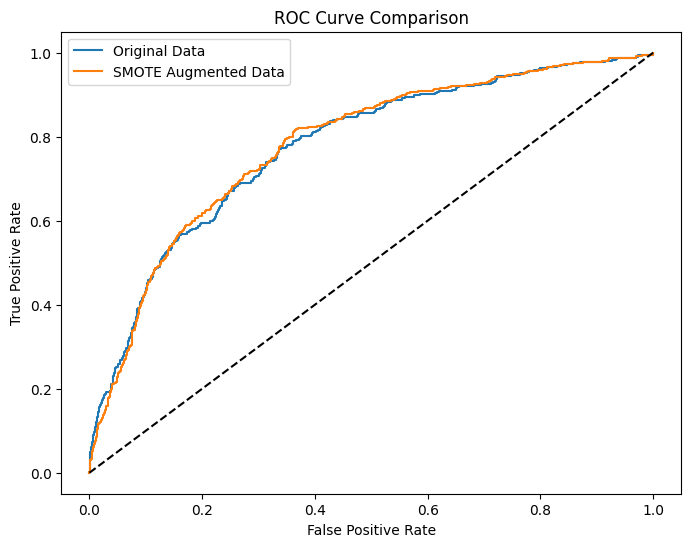

In [54]:
# Plot ROC curves
fpr_orig, tpr_orig, _ = roc_curve(y_test, y_prob_orig)
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_prob_smote)

plt.figure(figsize=(8, 6))
plt.plot(fpr_orig, tpr_orig, label='Original Data')
plt.plot(fpr_smote, tpr_smote, label='SMOTE Augmented Data')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()